In [162]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from plotnine import *
import statsmodels.formula.api as smf
import statsmodels.api as sm

In [137]:
df = pd.read_excel('Census_data.xlsx')

df.head()

# everything above 20

,children_in_household,weekly_hours_worked,age,household_income,birth_area,marital_status,sex,education,standard_occupational_classification,PUMA,ST
0,0,18,24,11000,7,5,2,22,434171,3810,36
1,0,35,59,96000,5,5,2,18,436011,3810,36
2,0,0,69,19200,1,5,1,18,N,3810,36
3,0,40,63,100000,5,1,1,16,119141,3810,36
4,0,0,63,100000,5,1,2,16,N,3810,36


In [138]:
df = df[df['household_income'] != -60000]
df=df[df['age']>=18]
df

,children_in_household,weekly_hours_worked,age,household_income,birth_area,marital_status,sex,education,standard_occupational_classification,PUMA,ST
0,0,18,24,11000,7,5,2,22,434171,3810,36
1,0,35,59,96000,5,5,2,18,436011,3810,36
2,0,0,69,19200,1,5,1,18,N,3810,36
3,0,40,63,100000,5,1,1,16,119141,3810,36
4,0,0,63,100000,5,1,2,16,N,3810,36
...,...,...,...,...,...,...,...,...,...,...,...
9872,1,30,44,100000,1,3,2,22,171011,3801,36
9874,0,0,62,6700,3,5,2,15,311121,3801,36
9875,0,40,78,438300,1,1,1,23,291210,3801,36
9876,0,35,52,438300,5,1,2,21,271024,3801,36


In [151]:
df['sex_male'] = df['sex'].apply(lambda x: 1 if x == 1 else 0)
df['sex_female'] = df['sex'].apply(lambda x: 1 if x == 2 else 0)

df['college_educated'] = df['education'].apply(lambda x: 1 if x >= 20 else 0)
df.head()

,children_in_household,weekly_hours_worked,age,household_income,birth_area,marital_status,sex,education,SOC,PUMA,...,job_maintenance,job_personcare,job_sales,job_admin,job_farmfishforest,job_construction,job_installation,job_production,job_transport,college_educated
0,0,18,24,11000,7,5,2,22,434171,3810,...,0,0,0,0,0,0,0,0,0,1
1,0,35,59,96000,5,5,2,18,436011,3810,...,0,0,0,0,0,0,0,0,0,0
2,0,0,69,19200,1,5,1,18,N,3810,...,0,0,0,0,0,0,0,0,0,0
3,0,40,63,100000,5,1,1,16,119141,3810,...,0,0,0,0,0,0,0,0,0,0
4,0,0,63,100000,5,1,2,16,N,3810,...,0,0,0,0,0,0,0,0,0,0


In [152]:
df['marital_married'] = df['marital_status'].apply(lambda x: 1 if x == 1 else 0)
df['marital_widowed'] = df['marital_status'].apply(lambda x: 1 if x == 2 else 0)
df['marital_divorced'] = df['marital_status'].apply(lambda x: 1 if x == 3 else 0)
df['marital_separated'] = df['marital_status'].apply(lambda x: 1 if x == 4 else 0)
df['marital_never'] = df['marital_status'].apply(lambda x: 1 if x == 5 else 0)
df.head()

,children_in_household,weekly_hours_worked,age,household_income,birth_area,marital_status,sex,education,SOC,PUMA,...,job_maintenance,job_personcare,job_sales,job_admin,job_farmfishforest,job_construction,job_installation,job_production,job_transport,college_educated
0,0,18,24,11000,7,5,2,22,434171,3810,...,0,0,0,0,0,0,0,0,0,1
1,0,35,59,96000,5,5,2,18,436011,3810,...,0,0,0,0,0,0,0,0,0,0
2,0,0,69,19200,1,5,1,18,N,3810,...,0,0,0,0,0,0,0,0,0,0
3,0,40,63,100000,5,1,1,16,119141,3810,...,0,0,0,0,0,0,0,0,0,0
4,0,0,63,100000,5,1,2,16,N,3810,...,0,0,0,0,0,0,0,0,0,0


In [153]:
df['birth_us'] = df['birth_area'].apply(lambda x: 1 if x in [1, 2] else 0)
df['birth_latin'] = df['birth_area'].apply(lambda x: 1 if x == 3 else 0)
df['birth_asia'] = df['birth_area'].apply(lambda x: 1 if x == 4 else 0)
df['birth_europe'] = df['birth_area'].apply(lambda x: 1 if x == 5 else 0)
df['birth_africa'] = df['birth_area'].apply(lambda x: 1 if x == 6 else 0)
df['birth_northern_america'] = df['birth_area'].apply(lambda x: 1 if x == 7 else 0)
df['birth_oceania'] = df['birth_area'].apply(lambda x: 1 if x == 8 else 0)
df.head()

,children_in_household,weekly_hours_worked,age,household_income,birth_area,marital_status,sex,education,SOC,PUMA,...,job_maintenance,job_personcare,job_sales,job_admin,job_farmfishforest,job_construction,job_installation,job_production,job_transport,college_educated
0,0,18,24,11000,7,5,2,22,434171,3810,...,0,0,0,0,0,0,0,0,0,1
1,0,35,59,96000,5,5,2,18,436011,3810,...,0,0,0,0,0,0,0,0,0,0
2,0,0,69,19200,1,5,1,18,N,3810,...,0,0,0,0,0,0,0,0,0,0
3,0,40,63,100000,5,1,1,16,119141,3810,...,0,0,0,0,0,0,0,0,0,0
4,0,0,63,100000,5,1,2,16,N,3810,...,0,0,0,0,0,0,0,0,0,0


In [154]:
df = df.rename(columns={'standard_occupational_classification': 'SOC'})

df.head()

,children_in_household,weekly_hours_worked,age,household_income,birth_area,marital_status,sex,education,SOC,PUMA,...,job_maintenance,job_personcare,job_sales,job_admin,job_farmfishforest,job_construction,job_installation,job_production,job_transport,college_educated
0,0,18,24,11000,7,5,2,22,434171,3810,...,0,0,0,0,0,0,0,0,0,1
1,0,35,59,96000,5,5,2,18,436011,3810,...,0,0,0,0,0,0,0,0,0,0
2,0,0,69,19200,1,5,1,18,N,3810,...,0,0,0,0,0,0,0,0,0,0
3,0,40,63,100000,5,1,1,16,119141,3810,...,0,0,0,0,0,0,0,0,0,0
4,0,0,63,100000,5,1,2,16,N,3810,...,0,0,0,0,0,0,0,0,0,0


In [155]:
print(len(df['SOC']))
for i in range(len(df['SOC'])): 
    instance = df['SOC']
    print(instance)
    if(instance == 'N'):
        df['SOC'][i] = 0
    else:
        df['SOC'][i] = int(str(df['SOC'][i])[0:2])

7655
0       434171
1       436011
2            N
3       119141
4            N
         ...  
9872    171011
9874    311121
9875    291210
9876    271024
9877         N
Name: SOC, Length: 7655, dtype: object


ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [156]:
df['job_unemployed'] = df['SOC'].apply(lambda x: 1 if x == 0 else 0)
df['job_unemployed'] = df['SOC'].apply(lambda x: 1 if x == 0 else 0)
df['job_management'] = df['SOC'].apply(lambda x: 1 if x == 11 else 0)
df['job_business'] = df['SOC'].apply(lambda x: 1 if x == 13 else 0)
df['job_technology'] = df['SOC'].apply(lambda x: 1 if x == 15 else 0)
df['job_engineering'] = df['SOC'].apply(lambda x: 1 if x == 17 else 0)
df['job_socialscience'] = df['SOC'].apply(lambda x: 1 if x == 19 else 0)
df['job_community'] = df['SOC'].apply(lambda x: 1 if x == 21 else 0)
df['job_legal'] = df['SOC'].apply(lambda x: 1 if x == 23 else 0)
df['job_edu'] = df['SOC'].apply(lambda x: 1 if x == 25 else 0)
df['job_art'] = df['SOC'].apply(lambda x: 1 if x == 27 else 0)
df['job_healthtech'] = df['SOC'].apply(lambda x: 1 if x == 29 else 0)
df['job_healthsupport'] = df['SOC'].apply(lambda x: 1 if x == 31 else 0)
df['job_protect'] = df['SOC'].apply(lambda x: 1 if x == 33 else 0)
df['job_foodprep'] = df['SOC'].apply(lambda x: 1 if x == 35 else 0)
df['job_maintenance'] = df['SOC'].apply(lambda x: 1 if x == 37 else 0)
df['job_personcare'] = df['SOC'].apply(lambda x: 1 if x == 39 else 0)
df['job_sales'] = df['SOC'].apply(lambda x: 1 if x == 41 else 0)
df['job_admin'] = df['SOC'].apply(lambda x: 1 if x == 43 else 0)
df['job_farmfishforest'] = df['SOC'].apply(lambda x: 1 if x == 45 else 0)
df['job_construction'] = df['SOC'].apply(lambda x: 1 if x == 47 else 0)
df['job_installation'] = df['SOC'].apply(lambda x: 1 if x == 49 else 0)
df['job_production'] = df['SOC'].apply(lambda x: 1 if x == 51 else 0)
df['job_transport'] = df['SOC'].apply(lambda x: 1 if x == 53 else 0)

In [158]:
df.head()

,children_in_household,weekly_hours_worked,age,household_income,birth_area,marital_status,sex,education,SOC,PUMA,...,job_maintenance,job_personcare,job_sales,job_admin,job_farmfishforest,job_construction,job_installation,job_production,job_transport,college_educated
0,0,18,24,11000,7,5,2,22,434171,3810,...,0,0,0,0,0,0,0,0,0,1
1,0,35,59,96000,5,5,2,18,436011,3810,...,0,0,0,0,0,0,0,0,0,0
2,0,0,69,19200,1,5,1,18,N,3810,...,0,0,0,0,0,0,0,0,0,0
3,0,40,63,100000,5,1,1,16,119141,3810,...,0,0,0,0,0,0,0,0,0,0
4,0,0,63,100000,5,1,2,16,N,3810,...,0,0,0,0,0,0,0,0,0,0


In [160]:
df.to_csv('regressable4.csv', index=False)

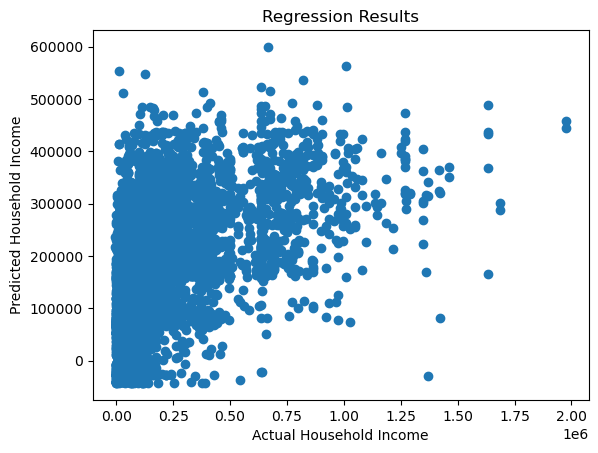

In [165]:
X = df[['age', 'sex', 'marital_status', 'college_educated', 'weekly_hours_worked', 'children_in_household']]
y = df[['household_income']]

X = sm.add_constant(X)

# Create and fit the OLS (Ordinary Least Squares) regression model
model = sm.OLS(y, X)
results = model.fit()

# Print the regression results
y_pred = results.predict(X)

results.su